# CLF-QP Controller
My notes about the CLF controller can be found in [this link](https://lopsided-sailfish-2df.notion.site/Lyapunov-Functions-and-Control-Barrier-Functions-232d71044bdf80989298d60b606f56b2).

## The System
The system modeled in this notebook is simply (a simple integrator):
$$
\dot{x} = u
$$

Which is a control affine system, where a control affine system is any system where:
$$
\dot{x} = f(x) + g(x)u
$$

## Recap of the Control Lyapunov Function (CLF)

The CLF is a function that must satisfy the following:

Given that you have a control affine system (defined above), we need a Lyapunov function that satisfies the following:


$$
V(x_e) = 0
$$
$$
V(x) > 0\ for\ x\neq x_e
$$
$$
\dot{V}(x, u) < 0\ for\ x \neq x_e 
$$

Assuming that our u is constant with time, and since our system is control affine, we can expand:
$$
\dot{V}(x) = \nabla V(x) \dot{x} = \nabla V(x) f(x) + \nabla V(x) g(x) u
$$

Hence we finally have the following constraint:

$$
\nabla V(x) f(x) + \nabla V(x) g(x) u < 0\ for\ x \neq x_e 
$$


## Defining the CLF for our system:

$$
V(x) = \frac{1}{2} x^2
$$

Taking the derivative:
$$
\dot{V}(x) = x\dot{x}=xu
$$

We also want to force V(x) to decay exponentially, so we define the following:
$$
\dot{V}(x)=xu \leq -cV(x)
$$

## Formulating the Quadratic-Program

We can then define the following quadratic program where:

$$
argmin ||u||
$$
Subject to the following constraint
$$
\dot{V}(x) + cV(x) \leq 0
$$
$$
xu + c \frac{1}{2}x^2 \leq 0
$$







In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# Parameters
c = 1.0  # CLF decay rate
T = 5.0
dt = 0.05
N = int(T / dt)
x = 5.0  # initial state


xs = [x]
us = []

In [3]:
for _ in range(N):
    # Define optimization variable
    u = cp.Variable()

    # Define CLF constraint: x*u + (c/2)x^2 <= 0
    V = 0.5 * x**2
    V_dot = x * u
    clf_constraint = V_dot + (c/2) * x**2 <= 0

    # Solve QP: minimize u^2 subject to CLF constraint
    prob = cp.Problem(cp.Minimize(cp.square(u)), [clf_constraint])
    prob.solve()

    # Apply control
    u_val = u.value
    us.append(u_val)
    x += u_val * dt
    xs.append(x)

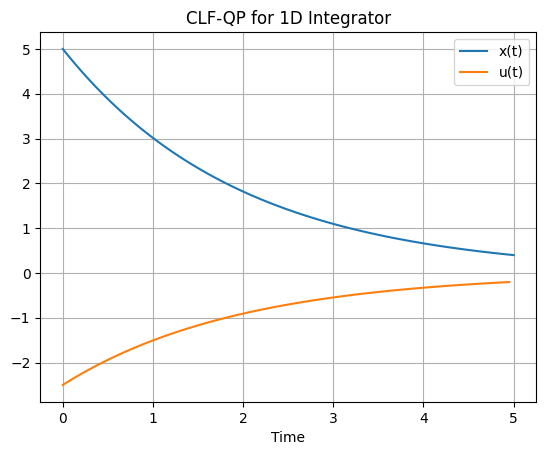

In [4]:
# Plotting
ts = np.linspace(0, T, N+1)
plt.plot(ts, xs, label="x(t)")
plt.plot(ts[:-1], us, label="u(t)")
plt.xlabel("Time")
plt.legend()
plt.title("CLF-QP for 1D Integrator")
plt.grid()
plt.show()